#                                               Projeto WPT


### Diagrama do modelo eletrodinâmico do circuito WPT


![alt text](eq.png "Alo")


$$ Z_{eq} = \frac{\frac{1}{j\omega{C}_{2}}R_{C}}{\frac{1}{j\omega{C}_{2}}+R_{C}} = \frac{R_{C}}{j\omega{R}_{C}{C}_{2} +1} $$

$$ \hat{V}_{f} = R_{1}\hat{I}_{1} + j\omega{L}_{1}\hat{I}_{1} + \frac{1}{j\omega{C}_{1}}\hat{I}_{1} - j\omega M\hat{I}_{2} $$

$$ j\omega M\hat{I}_{1} =  j\omega{L}_{2}\hat{I}_{2} + R_{2}\hat{I}_{2} + Z_{eq}\hat{I}_{2}$$


$$\begin{bmatrix} {R}_{1} + j\omega{L}_{1} + \frac{1}{j\omega{C}_{1}} & - j\omega M  \\ - j\omega M & j\omega{L}_{2} + R_{2} + Z_{eq}   \end{bmatrix} \begin{bmatrix} \hat{I}_{1} \\ \hat{I}_{2}  \end{bmatrix} = \begin{bmatrix} \hat{V}_{f} \\ 0  \end{bmatrix}$$

### Modelo Numérico


Módulos Utilizados


In [546]:
#Vamos importar os módulos que precisamos
from math import *
from cmath import *
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt

In [547]:
# Implementação Variáveis
R_1 = 1.701*4.2
R_2= 1.827*4.2
L_1 = 0.3444e-3
L_2 = 0.3608e-3
C_1 = 0.1e-6
C_2 = C_1
V1 = 9.9
RC= 100

In [548]:
w_ref = 1 / sqrt(((L_1)) * C_1)
f_ref = w_ref / (2*np.pi)
print(f'Frequência de ressonância : {abs(f_ref):.2f} Hz')

Frequência de ressonância : 27119.93 Hz


In [549]:
def calcula_parametros(w,k):
    M = k*np.sqrt(L_1*L_2)
    XL1 = 0 + w*L_1*1j
    XL2 = 0 + w*L_2*1j
    XC1 = 0 - (1/(w*C_1))*1j
    XC2 = 0 - (1/(w*C_2))*1j
    Z_eq = ( RC* XC2) / ( RC+ XC2)
    XM = 0 + (w*M)*1j
    Z1 = R_1 + XL1 + XC1
    Z2 = XL2 + R_2 + Z_eq
    Z = np.array([
        [Z1, -XM],
        [-XM,  Z2]
    ])
    V = np.array([V1, 0])
    I1,I2 = np.dot(linalg.inv(Z), V)
    V2 = Z_eq * I2
    IC = V2 / RC
    return I1, I2, IC, V2


### Gráficos das Correntes x Frequência


27220 28400 27250


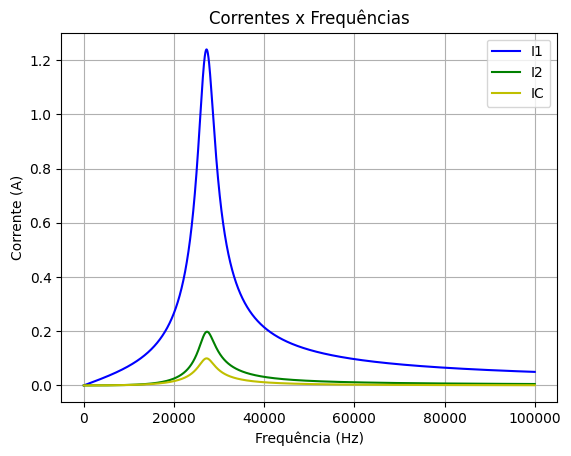

In [550]:
lista_frequencias = np.arange(10,100000,10)
params = [[],[],[],[]]
for f in lista_frequencias:
    w = 2*np.pi*f
    I1,I2,IC,V2 = calcula_parametros(w,0.1)
    params[0].append(I1)
    params[1].append(I2)
    params[2].append(IC)
    params[3].append(V2)

I1max, I2max, ICMAX= max(params[0]), max(params[1]), max(params[2])
indexI1, indexI2 , indexIC= params[0].index(I1max), params[1].index(I2max),params[2].index(ICMAX)
#Descobre a respectiva frequência para corrente máxima
fmax1,fmax2, fmaxc= lista_frequencias[indexI1],lista_frequencias[indexI2],lista_frequencias[indexIC]
print(fmax1,fmax2,fmaxc)
plt.plot(lista_frequencias,np.abs(params[0]),'b',label = ("I1"))
plt.plot(lista_frequencias,np.abs(params[1]),'g',label = ("I2"))
plt.plot(lista_frequencias,np.abs(params[2]),'y',label = ("IC"))
plt.legend()
plt.title('Correntes x Frequências')
plt.ylabel("Corrente (A)")
plt.xlabel("Frequência (Hz)")
plt.grid(True)
plt.show()



### Gráficos das Potências


In [551]:
def potencia(Veq, Ieq):
    S = (Veq/sqrt(2))*(Ieq/sqrt(2)).conjugate()
    return S
#Função que calcula potência em função de I do resistor e R
def potencia_resistor(Ir,R):
    S =R*(Ir/sqrt(2))*(Ir/sqrt(2)).conjugate()
    return S

In [552]:
params2 = [[],[],[],[]]

for f in lista_frequencias:
    w = 2*np.pi*f
    I1,I2,IC,V2 = calcula_parametros(w,0.1)
    S_entrada = potencia(I1,V1)
    S_saida = potencia(V2,IC)
    n = (S_saida.real/S_entrada.real)*100
    params2[0].append(abs(S_entrada.real))
    params2[1].append(abs(S_saida.real))
    params2[2].append(abs(n))
    params2[3].append(abs(V2))





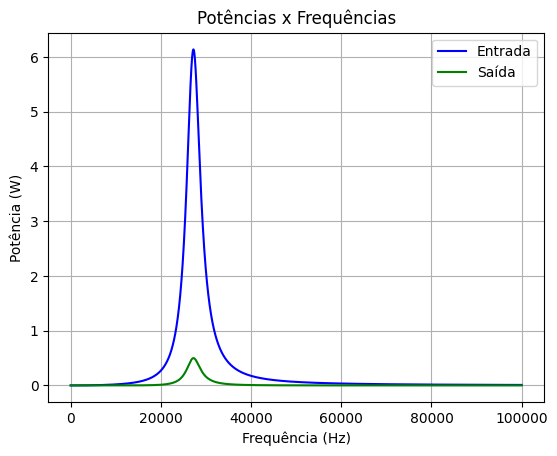

In [553]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(lista_frequencias,params2[0],'b',label = ("Entrada"))
plt.plot(lista_frequencias,params2[1],'g',label = ("Saída"))
plt.legend()
plt.title('Potências x Frequências')
plt.ylabel("Potência (W)")
plt.xlabel("Frequência (Hz)")
plt.grid(True)
plt.show()

### Gráfico Eficiência x Frequência


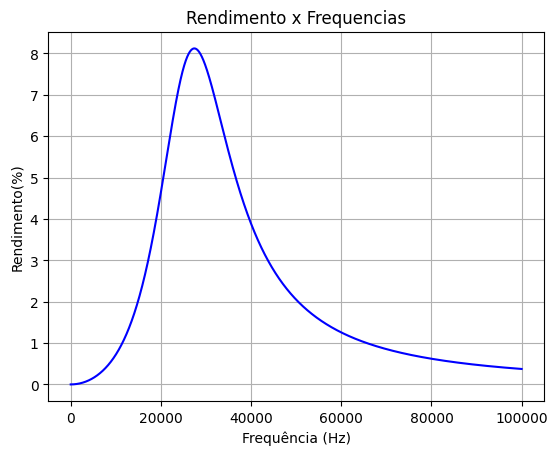

In [554]:
plt.plot(lista_frequencias,params2[2],'b')
plt.title('Rendimento x Frequencias')
plt.ylabel("Rendimento(%)")
plt.xlabel("Frequência (Hz)")
plt.grid(True)
plt.show()

### Gráfico Tensão na Carga x K


In [555]:
lista_k = np.arange(0,1,0.01)
lista_v = []
for k in lista_k:
    I1,I2,IC,V2 = calcula_parametros(27240*2*np.pi,k)
    lista_v.append(V2)

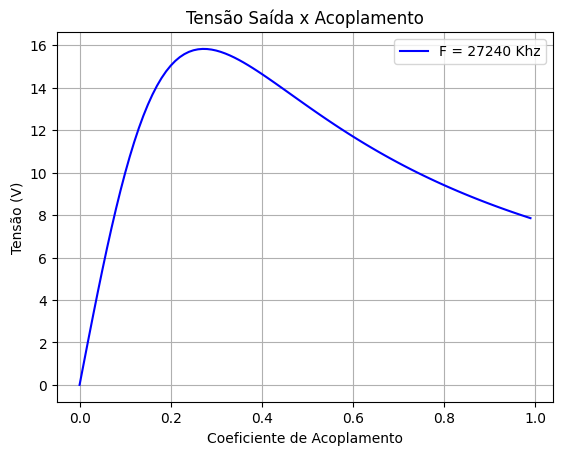

In [556]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(lista_k,np.abs(lista_v),'b',label = ("F = 27240 Khz"))
plt.title('Tensão Saída x Acoplamento')
plt.legend()
plt.ylabel("Tensão (V)")
plt.xlabel("Coeficiente de Acoplamento")
plt.grid(True)
plt.show()

## Comparação com o Real

### Dados Práticos

In [557]:
lista_distancias = [2,3.4,4.4,5.4,7.5,8.1,10.2, 13.9,17.4,20.5]
lista_tensoes_p = [10.75,13.75,15,15.8,13.35,12.55,9.15,5.35,3.3,2.3]


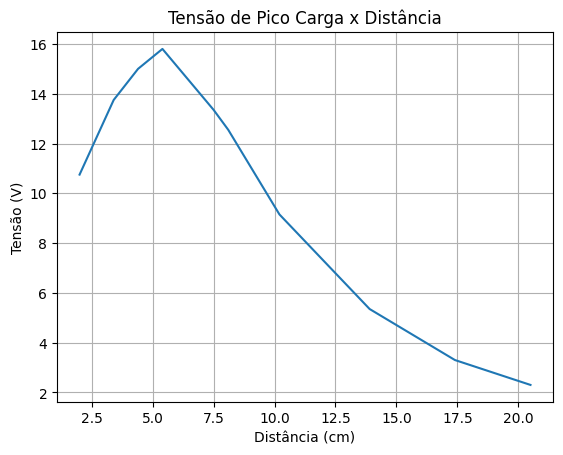

In [558]:
plt.plot(lista_distancias,lista_tensoes_p)
plt.title('Tensão de Pico Carga x Distância')
plt.ylabel("Tensão (V)")
plt.xlabel("Distância (cm)")
plt.grid(True)
plt.show()

In [559]:
lista_potencias = []
for v in lista_tensoes_p:
    S = ((v/sqrt(2))**2)/RC 
    lista_potencias.append(S.real)

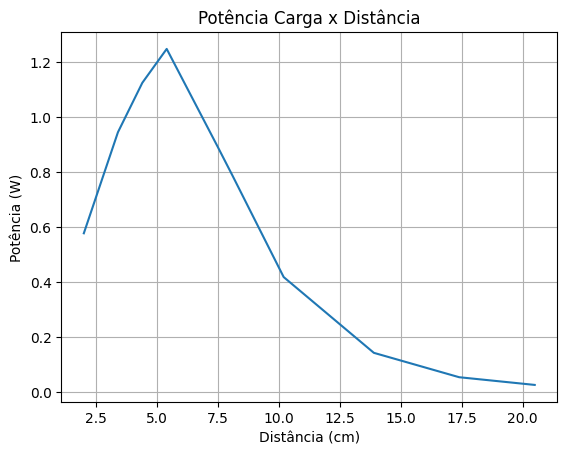

In [560]:
plt.plot(lista_distancias,lista_potencias)
plt.title('Potência Carga x Distância')
plt.ylabel("Potência (W)")
plt.xlabel("Distância (cm)")
plt.grid(True)
plt.show()

### Gráficos Comparativos

In [571]:
lista_k = np.arange(0,1,0.01)
lista_saida=  []
lista_potencias_reais = []
k_comparativo =0
x = 0
for k in lista_k:
    I1,I2,IC,V2 = calcula_parametros(27240*2*np.pi,k)
    lista_saida.append(abs(V2))
    S_saida = potencia(V2,IC)
    lista_potencias_reais.append(S_saida.real)

In [647]:
lista_k_reais = [lista_k[2],lista_k[3],lista_k[5],lista_k[9],lista_k[14],lista_k[15],lista_k[28],lista_k[37],lista_k[46],lista_k[67]]
lista_picos_reais_invertida = lista_tensoes_p[::-1]

[2.3, 3.3, 5.35, 9.15, 12.55, 13.35, 15.8, 15, 13.75, 10.75]


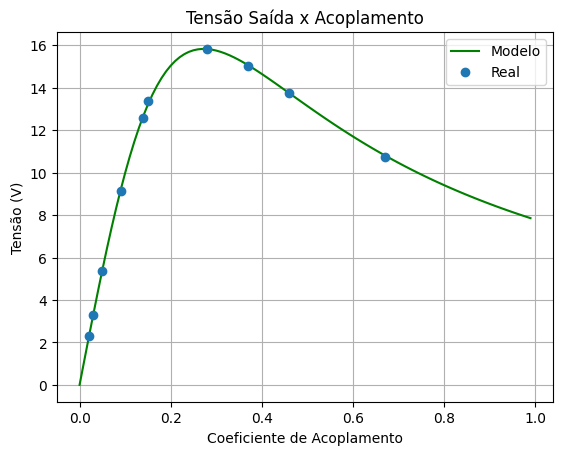

In [648]:
plt.plot(lista_k,np.abs(lista_saida),'g',label = ("Modelo"))
plt.plot(lista_k_reais,lista_picos_reais_invertida,'o',label = ("Real"))
plt.title('Tensão Saída x Acoplamento')
plt.legend()
plt.ylabel("Tensão (V)")
plt.xlabel("Coeficiente de Acoplamento")
plt.grid(True)
plt.show()

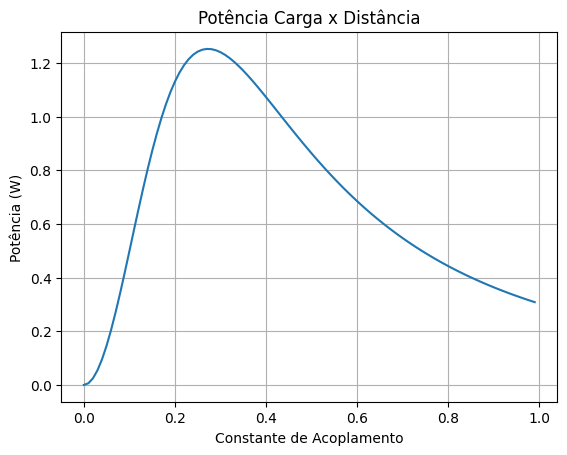

In [565]:
plt.plot(lista_k,lista_potencias_reais)
plt.title('Potência Carga x Distância')
plt.ylabel("Potência (W)")
plt.xlabel("Constante de Acoplamento")
plt.grid(True)
plt.show()